# <center> Pràctica 2: Neteja i anàlisi de dades </center>
## <center>Miquel Muntaner i Miquel Piulats</center>
### <center>08/01/2023</center>

<h1>Índex</h1>
<ul>
  <li><a href="#secció0">0. Càrrega de les llibreries necessàries de Python</a></li>
  <li><a href="#secció1">1. Descripció dels datasets</a></li>
  <li><a href="#secció2">2. Integració i selecció</a></li>
  <li><a href="#secció3">3. Neteja de les dades</a></li>
  <li><a href="#secció4">4. Anàlisi de les dades</a></li>
  <li><a href="#secció5">5. Resolució del problema</a></li>
</ul>


# 0. Càrrega de les llibreries necessàries de Python

In [ ]:
# Importem les llibreries necessàries per fer l'anàlisi exploratori
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

<h1 id="secció0">1. Descripció del dataset</h1>

És possible que un dels majors reptes i una de les principals finalitats de la vida sigui estar a un nivell de felicitat alt el màxim de temps possible. Gràcies a les dades que es recopilen avui en dia es poden fer alguns estudis que ens ajudaran a trobar els factors que ens aportin la tan ansiada felicitat. 

Per fer aquesta pràctica hem optat per utilitzar el dataset de *World Happiness Report* (https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021) per a tenir les variables principals a analitzar. 

El que hem volgut aconseguir amb aquest anàlisi és determinar els factors claus amb el que un individuu aconsegueix ser feliç. Per això s'ha tractat d'extreure la màxima informació al dataset principal, però també s'ha optat per aportar fonts extres d'informació per intentar trobar altres factors determinants. 



Columnes utilitzades:

*   Ladder score: Índex de felicitat
*   Logged GDP per capita: Ingrès promig de cada habitant
*   Social support: Gent propera amb la que pots comptar si tens un problema. 
*   Healthy life expectancy: esperança de vida
*   Freedom to make life choices: El sentiment de llibertat de la població respecte a la presa de decisions. 
*   Generosity: Índex que indica la generositat individual de cada habitant






 


Segons l'estudi de *Weather and Individual Happiness*, fet per Yoshiro Tsutsui (https://journals.ametsoc.org/view/journals/wcas/5/1/wcas-d-11-00052_1.xml), la climatologia afecta directament al benestar de l'individuu i per tant a la seva felicitat. Per això s'ha optat per extreure algunes dades d'un dataset que ens aporta valors climatològics per païssos. 

**Historical Daily Weather Data 2020**
https://www.kaggle.com/datasets/vishalvjoseph/weather-dataset-for-covid19-predictions
Històric de dades meteorològiques organitzades per països.
Columnes utilitzades:
*   temperatureHigh: Temperatura màxima registrada
*   temperatureLow: Temperatura mínima registrada
*   windSpeed: Velocitat del vent
*   precipProbability: Probabilitat de precipitació









Finalment també és conegut que alguns païssos del nord d'Europa tenen índexs molt alts de suicidis, el que pareix incompatible amb la felicitat. Per això també hem aportat algunes dades d'un dataset sobre ràtios de suicidi per païssos. 

**Suicide Rates Overview (1985 to 2021)**
https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021
Històric de nombre de suicidis organitzats per països.

Columnes utilitzades:
*   suicides_no - Nombre de suicidis
*   suicides/100k pop - Nombre de sucidis per cada 100.000 habitants.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carreguem el dataset de "World Happiness Report" i comprovem que s'ha carregat bé amb la funció head() que ens tornarà les 5 primeres files. 
df_2021 = pd.read_csv('/content/drive/MyDrive/Ciència de les dades/Tipologia i cicle de vida de les dades/Pràctica 2/world-happiness-report-2021.csv')
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


#2. Integració i selecció





Iniciem carregant els datasets addicionals que utilitzarem per a realitzar aquest estudi de dades.

In [ ]:
# Carreguem el dataset "Daily Weather 2020" i amb la funció head() observem les primeres 5 files.
df_weather = pd.read_csv('/content/drive/MyDrive/Ciència de les dades/Tipologia i cicle de vida de les dades/Pràctica 2/daily_weather_2020.csv')
df_weather.head()

,Unnamed: 0,Country/Region,Province/State,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,...,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Lat,Long,precipAccumulation
0,0,Afghanistan,NaN,2019-12-31,Rain (with a chance of 1–3 in. of snow) until ...,rain,1.577847e+09,1.577883e+09,0.20,0.0156,...,1577827140,48.36,1577864700,30.51,1577835720,47.86,1577864700,33.0,65.0,NaN
1,1,Afghanistan,NaN,2020-01-01,Light rain throughout the day.,rain,1.577933e+09,1.577969e+09,0.23,0.0235,...,1577918820,40.42,1577951460,29.84,1577919420,40.08,1577951220,33.0,65.0,NaN
2,2,Afghanistan,NaN,2020-01-02,Clear throughout the day.,rain,1.578019e+09,1.578056e+09,0.26,0.0016,...,1578020400,46.53,1578038340,26.27,1578020400,46.03,1578038340,33.0,65.0,NaN
3,3,Afghanistan,NaN,2020-01-03,Partly cloudy throughout the day.,partly-cloudy-day,1.578106e+09,1.578142e+09,0.30,0.0003,...,1578106320,45.77,1578124500,26.96,1578093240,45.35,1578124260,33.0,65.0,NaN
4,4,Afghanistan,NaN,2020-01-04,Light rain throughout the day.,rain,1.578192e+09,1.578228e+09,0.33,0.0145,...,1578193080,40.84,1578222000,33.33,1578193080,40.34,1578222000,33.0,65.0,NaN


In [ ]:
# Carreguem el dataset "Suicide Rates Overview (1985 to 2021)" i amb la funció head() observem les primeres 5 files.
df_suicide = pd.read_csv('/content/drive/MyDrive/Ciència de les dades/Tipologia i cicle de vida de les dades/Pràctica 2/suicide.csv', index_col=False)
df_suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


#3. Neteja de les dades


En cada dataset ens assegurarem que no hi ha dades duplicades i també que no hi hagi valors nuls. En aquest cas hauríem de solucionar-ho. Com que treballarem les dades per països farem que el nom de la columna 'Country name' sigui coincident.

In [ ]:
# Comprovem que el dataset no tingui valors duplicats.
df_2021.duplicated().sum()

0

Ens assegurem que totes les columnes siguin del tipus que volem, en el nostre cas volem que els valors numèrics siguin flotants o enters per a poder fer operacions numèriques tal com sumes o mitjanes. Amb el resultat podem veure que està tot en ordre. 

In [ ]:
df_2021.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [ ]:
# Comprovem que el dataset no tingui valors duplicats.
df_weather.duplicated().sum()

0

In [ ]:
# Comprovem que el dataset no tingui valors duplicats.
df_suicide.duplicated().sum()

0

Volem juntar els tres datasets que hem carregat, però necessitem que una de les columnes coincideixi. Per això canviem el nom de la columna on estan els païssos per "Country name", i comprovem que s'ha canviat correctament amb la funció head().

In [ ]:
df_weather.columns = ['Country name' if x=='Country/Region' else x for x in df_weather.columns]
df_weather.head()

,Unnamed: 0,Country name,Province/State,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,...,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Lat,Long,precipAccumulation
0,0,Afghanistan,NaN,2019-12-31,Rain (with a chance of 1–3 in. of snow) until ...,rain,1.577847e+09,1.577883e+09,0.20,0.0156,...,1577827140,48.36,1577864700,30.51,1577835720,47.86,1577864700,33.0,65.0,NaN
1,1,Afghanistan,NaN,2020-01-01,Light rain throughout the day.,rain,1.577933e+09,1.577969e+09,0.23,0.0235,...,1577918820,40.42,1577951460,29.84,1577919420,40.08,1577951220,33.0,65.0,NaN
2,2,Afghanistan,NaN,2020-01-02,Clear throughout the day.,rain,1.578019e+09,1.578056e+09,0.26,0.0016,...,1578020400,46.53,1578038340,26.27,1578020400,46.03,1578038340,33.0,65.0,NaN
3,3,Afghanistan,NaN,2020-01-03,Partly cloudy throughout the day.,partly-cloudy-day,1.578106e+09,1.578142e+09,0.30,0.0003,...,1578106320,45.77,1578124500,26.96,1578093240,45.35,1578124260,33.0,65.0,NaN
4,4,Afghanistan,NaN,2020-01-04,Light rain throughout the day.,rain,1.578192e+09,1.578228e+09,0.33,0.0145,...,1578193080,40.84,1578222000,33.33,1578193080,40.34,1578222000,33.0,65.0,NaN


In [ ]:
df_suicide.columns = ['Country name' if x=='country' else x for x in df_suicide.columns]
df_suicide.head()

,Country name,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [ ]:
# Agrupem les files per països i fem la mitja anual de cada una de les variables. 
weather_by_country = df_weather.groupby('Country name').mean()
weather_by_country.head()

,Unnamed: 0,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,temperatureHigh,temperatureHighTime,...,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Lat,Long,precipAccumulation
Country name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,55.5,1.582640e+09,1.582681e+09,0.508661,0.006422,0.022493,1.582656e+09,0.265268,53.353750,1.582666e+09,...,1.582644e+09,53.371875,1.582666e+09,32.655893,1.582646e+09,52.652411,1.582666e+09,33.0000,65.0000,0.052778
Albania,167.5,1.582651e+09,1.582691e+09,0.513214,0.006932,0.024271,1.582707e+09,0.323929,58.572946,1.582675e+09,...,1.582662e+09,58.746964,1.582673e+09,38.496696,1.582657e+09,58.018304,1.582673e+09,41.1533,20.1683,0.010000
Algeria,279.5,1.582655e+09,1.582696e+09,0.513482,0.000488,0.002764,1.582741e+09,0.034196,79.553304,1.582683e+09,...,1.582651e+09,79.628125,1.582682e+09,51.879554,1.582651e+09,79.128125,1.582682e+09,28.0339,1.6596,NaN
Andorra,391.5,1.582655e+09,1.582695e+09,0.513214,0.004790,0.015194,1.582746e+09,0.265804,56.552143,1.582679e+09,...,1.582659e+09,56.569196,1.582678e+09,34.852768,1.582660e+09,55.643750,1.582678e+09,42.5063,1.5218,0.020000
Antigua and Barbuda,503.5,1.582583e+09,1.582625e+09,0.505000,0.003291,0.010244,1.582600e+09,0.321607,81.999375,1.582609e+09,...,1.582574e+09,81.999375,1.582609e+09,76.095089,1.582574e+09,85.809911,1.582608e+09,17.0608,-61.7964,NaN


En el cas del dataset dels suicidis primer agruparem per anys i després per païssos. 
Seleccionar les files de l'any 2017, ja que és l'any més proper amb totes les dades de sucidis per 100.000 habitants per pais. 

In [ ]:
df_year = df_suicide.query("year == 2017")

# Agrupar les files seleccionades por païssos
df_country_suicides = df_year.groupby(by='Country name').mean()
df_country_suicides.head()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
Country name,,,,,,
Antigua and Barbuda,2017.0,0.000000,91119.0,0.000000,0.923176,15383.576400
Argentina,2017.0,265.416667,44044811.0,0.602606,0.843538,14613.041820
Armenia,2017.0,3.666667,2851923.0,0.128568,0.764582,3914.527854
Australia,2017.0,274.250000,24594202.0,1.115100,0.935291,53934.250180
Austria,2017.0,102.000000,8797566.0,1.159412,0.913353,47312.006230


Veim que no ens surt la columna *Country name* perquè ens ho agafa com a Index

In [ ]:
df_country_suicides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, Antigua and Barbuda to Uzbekistan
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                82 non-null     float64
 1   suicides_no         78 non-null     float64
 2   population          82 non-null     float64
 3   suicides/100k pop   82 non-null     float64
 4   HDI for year        82 non-null     float64
 5   gdp_per_capita ($)  82 non-null     float64
dtypes: float64(6)
memory usage: 4.5+ KB


Arreglem el tema de la columna de Country name i comprovem el nombre de nuls que hi ha per cada columna, encara que la que ens interessa és la de suicides/100k

In [ ]:
df_country_suicides = df_country_suicides.reset_index()
df_country_suicides.isna().sum()

Country name          0
year                  0
suicides_no           4
population            0
suicides/100k pop     0
HDI for year          0
gdp_per_capita ($)    0
dtype: int64

Ens quedem amb les dues variables que ens podran servir per fer l'anàlisi. 

In [ ]:
interesting_columns = ['Country name', 'suicides_no', 'suicides/100k pop']
df_country_suicides = df_country_suicides[interesting_columns]
df_country_suicides.head()

,Country name,suicides_no,suicides/100k pop
0,Antigua and Barbuda,0.000000,0.000000
1,Argentina,265.416667,0.602606
2,Armenia,3.666667,0.128568
3,Australia,274.250000,1.115100
4,Austria,102.000000,1.159412


A la següent funció obtindrem els noms de totes les columnes del dataframe weather per posteriormen seleccionar les que més ens interessin. 


In [ ]:
weather_by_country.columns

Index(['Unnamed: 0', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensity', 'precipIntensityMax', 'precipIntensityMaxTime',
       'precipProbability', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'humidity', 'pressure',
       'windSpeed', 'windGust', 'windGustTime', 'windBearing', 'cloudCover',
       'uvIndex', 'uvIndexTime', 'visibility', 'ozone', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'Lat', 'Long',
       'precipAccumulation'],
      dtype='object')

Ens quedem amb 4 variables que ens podran servir per fer l'anàlisi. 

In [ ]:
interesting_columns = ['temperatureHigh', 'temperatureLow', 'windSpeed', 'precipProbability']
weather_by_country_sub = weather_by_country[interesting_columns]
weather_by_country_sub.head()

,temperatureHigh,temperatureLow,windSpeed,precipProbability
Country name,,,,
Afghanistan,53.353750,36.118571,3.765982,0.265268
Albania,58.572946,40.961786,3.825000,0.323929
Algeria,79.553304,53.233214,11.839554,0.034196
Andorra,56.552143,36.871518,3.325000,0.265804
Antigua and Barbuda,81.999375,74.604732,14.500536,0.321607


Creem una nova columna per saber la mitja de la temperatura per país, ja que només teníem les màximes i mínimes. 

In [ ]:
weather_by_country_sub['temperatureAvg'] = (weather_by_country_sub['temperatureHigh'] + weather_by_country_sub['temperatureLow'])/2
weather_by_country_sub.head()

<ipython-input-20-1530b718061a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_by_country_sub['temperatureAvg'] = (weather_by_country_sub['temperatureHigh'] + weather_by_country_sub['temperatureLow'])/2


,temperatureHigh,temperatureLow,windSpeed,precipProbability,temperatureAvg
Country name,,,,,
Afghanistan,53.353750,36.118571,3.765982,0.265268,44.736161
Albania,58.572946,40.961786,3.825000,0.323929,49.767366
Algeria,79.553304,53.233214,11.839554,0.034196,66.393259
Andorra,56.552143,36.871518,3.325000,0.265804,46.711830
Antigua and Barbuda,81.999375,74.604732,14.500536,0.321607,78.302054


Fem un merge dels dos datasets, que tenen en comú la columna "Country name"

In [ ]:
df_combined_data = df_2021.merge(weather_by_country_sub, on='Country name')
df_combined_data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,temperatureHigh,temperatureLow,windSpeed,precipProbability,temperatureAvg
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.741,0.691,0.124,0.481,3.253,34.923929,24.960000,8.594643,0.393393,29.941964
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.763,0.686,0.208,0.485,2.868,43.955357,36.407143,17.484732,0.540937,40.181250
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.816,0.653,0.204,0.413,2.839,42.581964,29.567589,3.653661,0.323214,36.074777
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.772,0.698,0.293,0.170,2.967,25.709375,16.010804,17.049821,0.371071,20.860089
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.753,0.647,0.302,0.384,2.798,74.085268,64.644018,16.011488,0.264435,69.364643


Fem un merge amb el tercer dataset per incluir la columna dels suicidis

In [ ]:
df_main = df_combined_data.merge(df_country_suicides, on='Country name')
df_main.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,temperatureHigh,temperatureLow,windSpeed,precipProbability,temperatureAvg,suicides_no,suicides/100k pop
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.124,0.481,3.253,34.923929,24.960000,8.594643,0.393393,29.941964,68.666667,1.246623
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.208,0.485,2.868,43.955357,36.407143,17.484732,0.540937,40.181250,48.583333,0.842732
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.204,0.413,2.839,42.581964,29.567589,3.653661,0.323214,36.074777,86.916667,1.028376
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.293,0.170,2.967,25.709375,16.010804,17.049821,0.371071,20.860089,2.833333,0.825083
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.302,0.384,2.798,74.085268,64.644018,16.011488,0.264435,69.364643,159.750000,0.932504


A la següent funció obtindrem dee nou els noms de totes les columnes del dataframe main i seleccionarem les que més ens interessin. 

In [ ]:
df_main.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'precipProbability', 'temperatureAvg', 'suicides_no',
       'suicides/100k pop'],
      dtype='object')

Ens quedem amb les variables que ens podran servir per fer l'anàlisi. 

In [ ]:
interesting_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'windSpeed', 'precipProbability','temperatureAvg', 'suicides/100k pop']
df_main = df_main[interesting_columns]
df_main.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,windSpeed,precipProbability,temperatureAvg,suicides/100k pop
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,8.594643,0.393393,29.941964,1.246623
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,17.484732,0.540937,40.181250,0.842732
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,3.653661,0.323214,36.074777,1.028376
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,17.049821,0.371071,20.860089,0.825083
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,16.011488,0.264435,69.364643,0.932504


In [ ]:
# Ens assegurem de que els valors buits tinguin el valor de nul. 
df_main.replace("", np.nan, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Sumem la quantitat de valors nuls per columna, i veim que no tenim cap valor nul d'acumulació de precipitació. 

In [ ]:
df_main.isna().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
windSpeed                       0
precipProbability               0
temperatureAvg                  0
suicides/100k pop               0
dtype: int64

In [ ]:
df_main.to_csv('/content/drive/MyDrive/Ciència de les dades/Tipologia i cicle de vida de les dades/Pràctica 2/main.csv')

#4. Anàlisi de les dades

Una vegada feta la neteja de dades, ja podem començar amb l'anàlisi de les dades. Hem creat un dataset amb les variables que més ens interessen, i ens hem assegurat de que no hi hagi valors nuls que ens puguin molestar a l'hora de fer l'anàlisi. 

Començarem en fer unes gràfiques de boxplot per veure si tenim qualque outlier a corregir entre les dades que més ens interessen. 

El primer gràfic surt bé. 

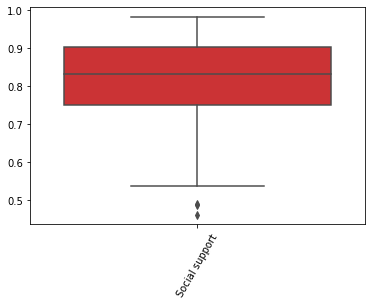

In [ ]:
list_features = ["Social support"]
sns.boxplot(data = df_2021.loc[:, list_features], orient = "v", palette = "Set1")
plt.xticks(rotation = 60)
plt.show()

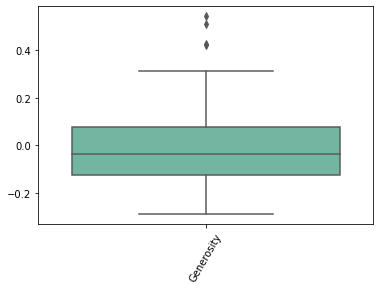

In [ ]:
list_features = ["Generosity"]
sns.boxplot(data = df_2021.loc[:, list_features], orient = "v", palette = "Set2")
plt.xticks(rotation = 60)
plt.show()

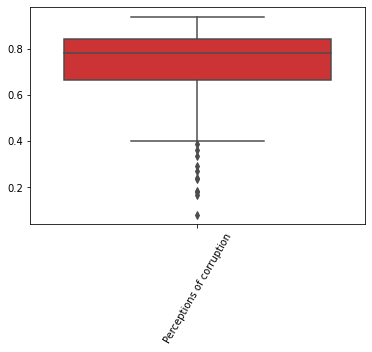

In [ ]:
list_features = ["Perceptions of corruption"]
sns.boxplot(data = df_2021.loc[:, list_features], orient = "v", palette = "Set1")
plt.xticks(rotation = 60)
plt.show()

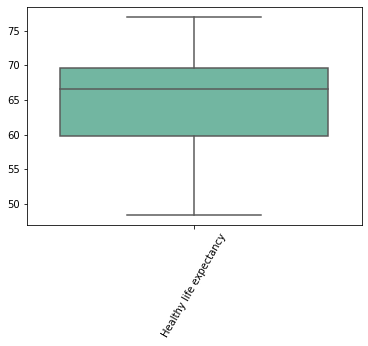

In [ ]:
list_features = ["Healthy life expectancy"]
sns.boxplot(data = df_2021.loc[:, list_features], orient = "v", palette = "Set2")
plt.xticks(rotation = 60)
plt.show()

Gràcies al següent *boxplot* podem comprovar que tenim un outlier molt evident que s'haurà de corregir. 

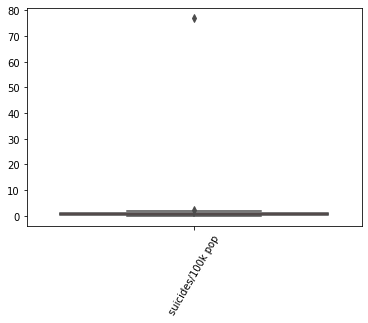

In [ ]:
list_features = ["suicides/100k pop"]
sns.boxplot(data = df_main.loc[:, list_features], orient = "v", palette = "Set1")
plt.xticks(rotation = 60)
plt.show()

Com que només és un, hem decidit buscar la informació per un altre costat per fer la substitució del valor. Primer hem de localitzar de quin valor es tracta i a quin pais pertany. 

In [ ]:
# Identifiquem quin és el país que té el valor màxim
max_suicides_index = df_main['suicides/100k pop'].idxmax()
max_suicides_country = df_main.loc[max_suicides_index, 'Country name']
max_suicides_country

'Slovakia'

Una vegada detectat, hem decidit buscar a internet i segons un estudi fet per la World Health Organization i la web www.countryeconomy.com (https://countryeconomy.com/demography/mortality/causes-death/suicide/slovakia) Eslovàquia va tenir un índex de suicidi proper al 7 per 100.000 durant l'any 2017, per tant es pot entendre que al nostre dataset es va afegir un 0 per error després del 7. Així que corregim aquesta dada. 

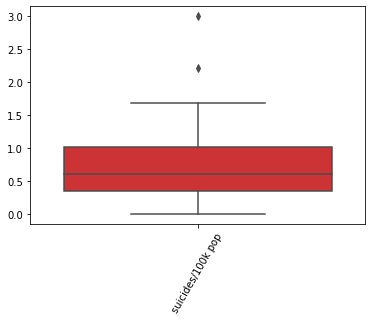

In [ ]:
# Corregim la dada i tornem a mostrar el boxplot.
df_main.loc[df_main['Country name'] == 'Slovakia', 'suicides/100k pop'] = 3
list_features = ["suicides/100k pop"]
sns.boxplot(data = df_main.loc[:, list_features], orient = "v", palette = "Set1")
plt.xticks(rotation = 60)
plt.show()

Aquesta vegada podem veure que el boxplot resultant ja està dintre dels rangs normals.

A continuació seguirem fent un gràfic de barres amb els païssos que lideren el rànquing de més suïcidis per habitant al món. 

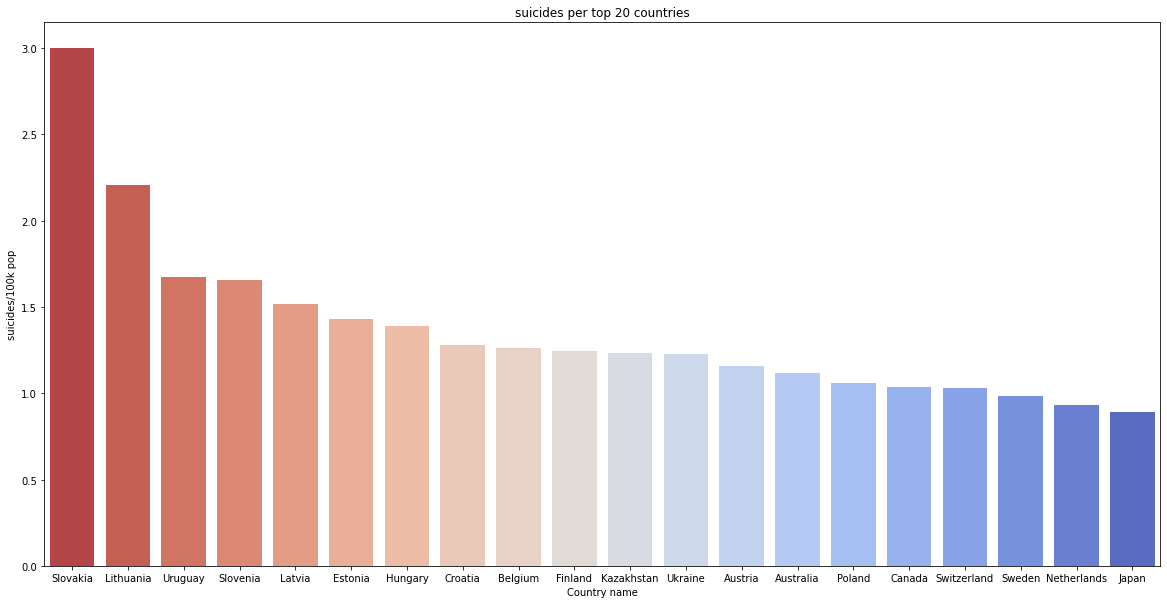

In [ ]:
df_suicides_countries = df_main.sort_values(by='suicides/100k pop', ascending=False)
df_top_12 = df_suicides_countries.head(20)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = "suicides/100k pop", x = "Country name", data=df_top_12, palette = "coolwarm_r", ax=ax)
plt.title("suicides per top 20 countries")
plt.show()

També fem el rànquing a la inversa. Els 20 païssos amb menys taxa de suicidi. 

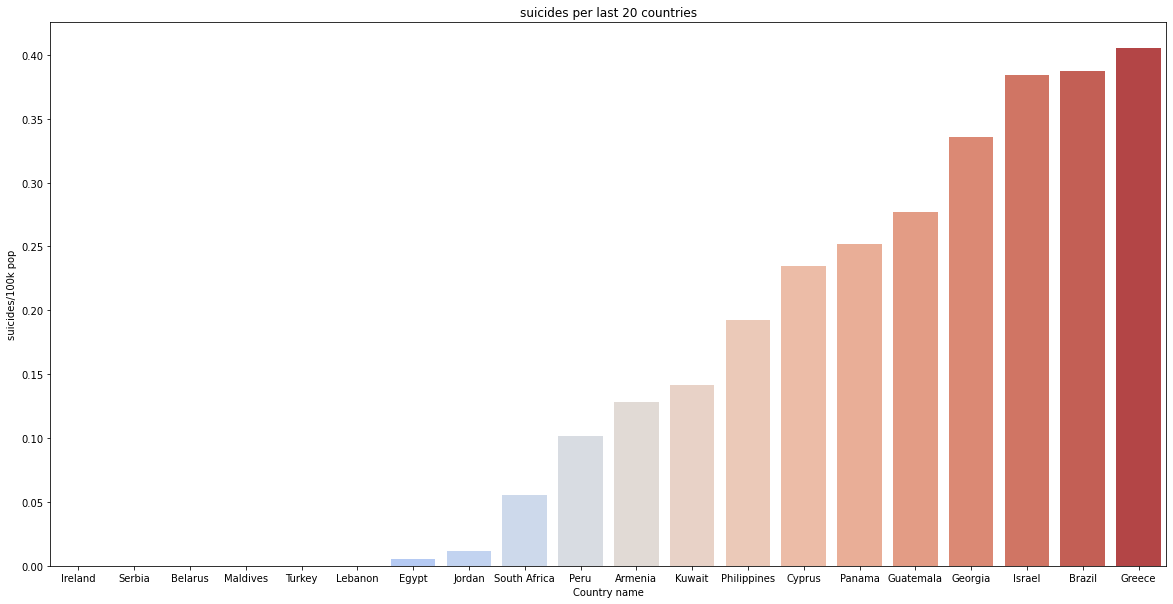

In [ ]:
df_bottom_20 = df_main.nsmallest(20, 'suicides/100k pop')
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = "suicides/100k pop", x = "Country name", data=df_bottom_20, palette = "coolwarm", ax=ax)
plt.title("suicides per last 20 countries")
plt.show()

En contraposició també volem analitzar els païssos on l'index de felicitat al món és més alt. 

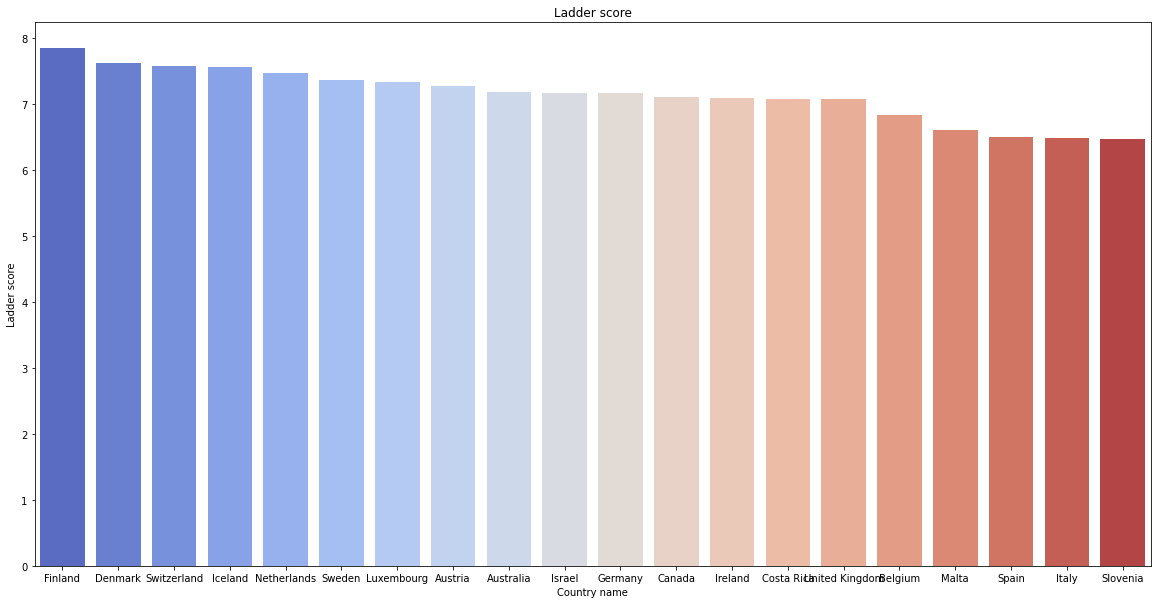

In [ ]:
df_happiest_countries = df_main.sort_values(by='Ladder score', ascending=False)
df_top_20 = df_happiest_countries.head(20)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = "Ladder score", x = "Country name", data=df_top_20, palette = "coolwarm", ax=ax)
plt.title("Ladder score")
plt.show() 

També volem veure els 20 païssos menys feliços començant per la cua. 

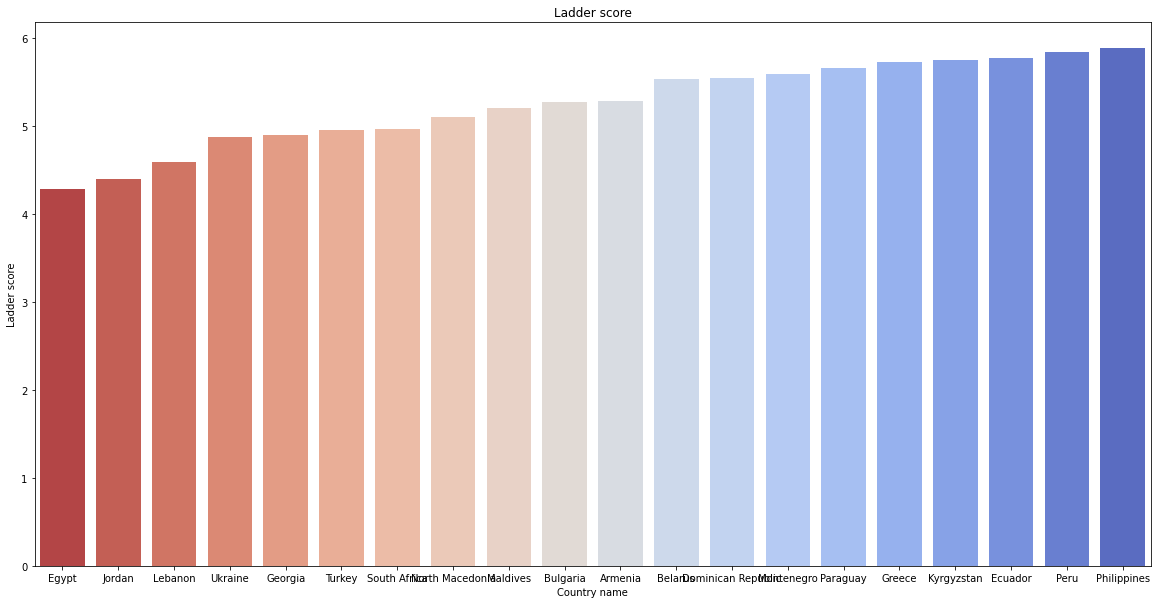

In [ ]:
df_unhappiest_countries = df_main.nsmallest(20, 'Ladder score')
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = "Ladder score", x = "Country name", data=df_unhappiest_countries, palette = "coolwarm_r", ax=ax)
plt.title("Ladder score")
plt.show() 

També ens interessa el rànquing de felicitat per regió. 

In [ ]:
import plotly.express as px
Avg_happiness = df_main.groupby('Regional indicator')['Ladder score'].mean()
Avg_happiness = Avg_happiness.sort_values(ascending=False)
fig9 = px.bar(Avg_happiness, title='Happiness Score by Region',
             labels={'Region': 'Region', 'value': 'Happiness Score(Avg)'},
             )
fig9.update_layout(width=800, showlegend=False)
fig9.show() 

Volem explorar la normalitat de la felicitat amb un histograma. 

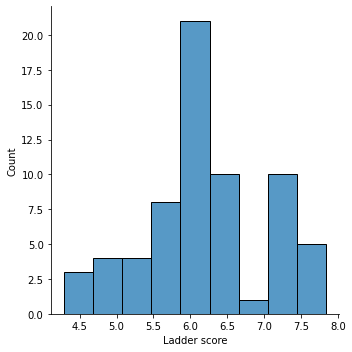

In [ ]:
sns.displot(df_main['Ladder score'])

Agafem el mateix histograma però amb més detalls per zona i freqüència de la puntuació de felicitat, que ens dona cada país de la regió. 

In [ ]:
fig = px.histogram(data_frame=df_main, x='Ladder score', color='Regional indicator', nbins=30)
fig.update_layout(title='Histogram of happiness per region',
                xaxis_title='Ladder score',
                yaxis_title='Frequency')
fig.show()

Amb els dos histogrames anteriors hem vist que els gràfics pareix que tenen una distribució normal. Per això feim un anàlisi de contrast d'hipotesi en el que li donem una confiança del 95%. 

In [ ]:
alpha = 0.05
_,pvalor = normaltest(df_main['Ladder score'])
if pvalor < alpha:
    print("Rebutgem la hipòtesi nul·la. La distribució és normal.")
else:
    print("No podem rebutjar la hipòtesi nul·la. No podem afirmar que la distribució sigui normal.")

No podem rebutjar la hipòtesi nul·la. No podem afirmar que la distribució sigui normal.


No ens ha sortit favorable, però ja hem pogut fer el contrast. 

A continuació hem decidit fer un mapa de correlació entre les diferents variables del dataset. 

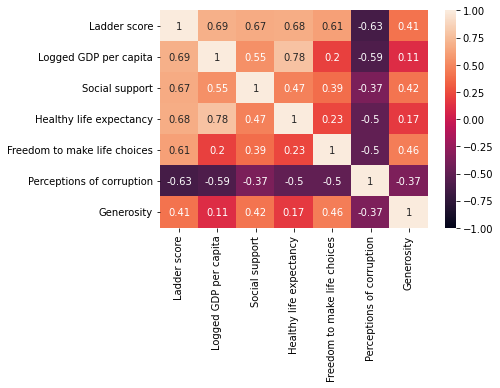

In [ ]:
# Creem un gràfic de correlació per veure quines variables tenen un índex més alt
df_corr = df_main[['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption','Generosity']].corr()
sns.heatmap(df_corr, vmin=-1, vmax=1,annot=True)


A l'anterior gràfic podem observar que les variables de Logged GDP per capita, Healthy life expectancy i Ladder score tenen un índex de correlació bastant alt entre ells, per tant podem analitzar més en detall si segueix una línea de normalitat entre els diferents païssos. 

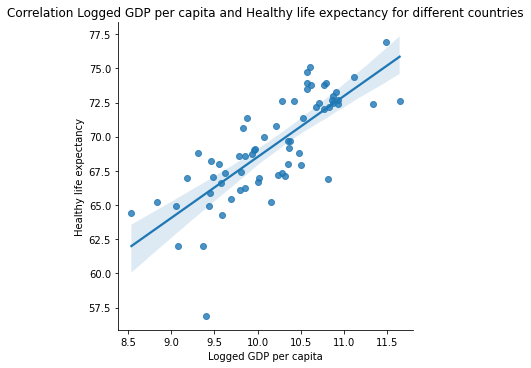

In [ ]:
sns.lmplot(x="Logged GDP per capita", y="Healthy life expectancy", data=df_main)
plt.xlabel("Logged GDP per capita")
plt.ylabel("Healthy life expectancy")
plt.title("Correlation Logged GDP per capita and Healthy life expectancy for different countries")
plt.show()

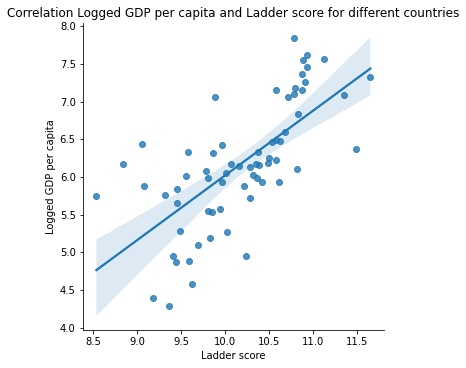

In [ ]:
sns.lmplot(y="Ladder score", x="Logged GDP per capita", data=df_main)
plt.xlabel("Ladder score")
plt.ylabel("Logged GDP per capita")
plt.title("Correlation Logged GDP per capita and Ladder score for different countries")
plt.show()

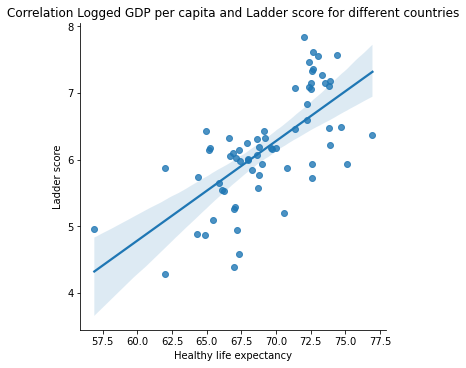

In [ ]:
sns.lmplot(y="Ladder score", x="Healthy life expectancy", data=df_main)
plt.ylabel("Ladder score")
plt.xlabel("Healthy life expectancy")
plt.title("Correlation Logged GDP per capita and Ladder score for different countries")
plt.show()

Amb els anteriors gràfics hem pogut comprovar que pareix que hi ha una relació bastant directe entre les diferents variables i que segueix una tendència proporcional. 

Provem de fer el mateix entre les variables de climatologia incloses al dataset. 

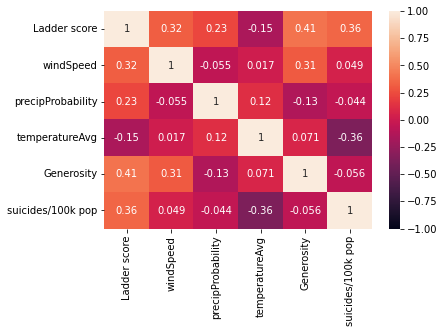

In [ ]:
df_corr = df_main[['Ladder score','windSpeed','precipProbability','temperatureAvg','Generosity', 'suicides/100k pop']].corr()
sns.heatmap(df_corr, vmin=-1, vmax=1,annot=True)

No sembla que tinguin molta relació entre les variables de clima i la felicitat, per tant es descarta la relació entre ells. 

Els païssos de la regió d'Europa de l'oest, semblen ser els païssos que ocupen el segon lloc en el rànquing de la felicitat segons el "World Happiness Report", però resulta que també alguns d'ells tenen un alt índex de suicidis, com podem comprovar al següent gràfic. 

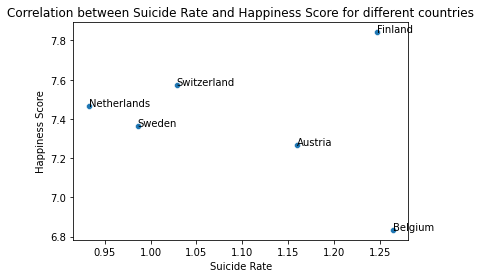

In [ ]:
suicide_threshold = 0.9
happiness_threshold = 0.9
region = "Western Europe"
df_filtered = df_main.query("`suicides/100k pop` > @suicide_threshold and `Ladder score` > @happiness_threshold and `Regional indicator` == @region")

sns.scatterplot(x="suicides/100k pop", y="Ladder score", alpha = 1, data=df_filtered)

for index, row in df_filtered.iterrows():
    plt.annotate(row["Country name"], (row["suicides/100k pop"], row["Ladder score"]))
plt.xlabel("Suicide Rate")
plt.ylabel("Happiness Score")
plt.title("Correlation between Suicide Rate and Happiness Score for different countries")
plt.show()

També hem volgut comprovar si un índex baix de felicitat , també indicava un alt nombre de suicidis i sí pareix que segueix certa tendència. 

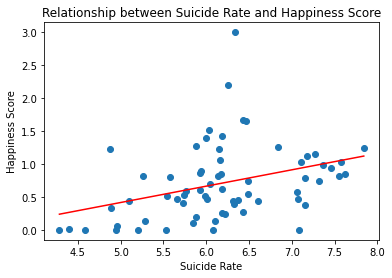

In [ ]:
y = df_main['suicides/100k pop']
x = df_main['Ladder score']

coef = np.polyfit(x, y, 1)
line = np.poly1d(coef)

plt.scatter(x, y)
plt.xlabel('Suicide Rate')
plt.ylabel('Happiness Score')
plt.title('Relationship between Suicide Rate and Happiness Score')
plt.plot(x, line(x), 'r-')
plt.show()

Ara farem la comparació d'algunes variables entre el pais que està el número 1 del rànquing de la felicitat (Finlandia) i el que està a la cua (Egipte), per a comparar els gràfics entre ells. 

Per això carragarem el dataset històric de "World Happiness Report"

In [ ]:
df_history = pd.read_csv('/content/drive/MyDrive/Ciència de les dades/Tipologia i cicle de vida de les dades/Pràctica 2/world-happiness-report.csv')
df_history.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


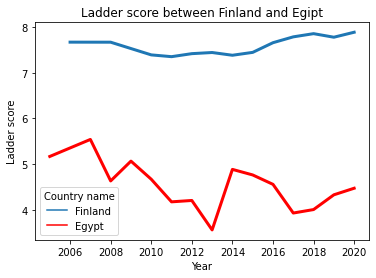

In [ ]:
# Crear dataframes par Finlandia i Egipte
df_finland = df_history[df_history['Country name'] == "Finland"]
df_egypt = df_history[df_history['Country name'] == "Egypt"]
color = ['red']
# Crear gràfic de línia amb els dos païssos superposts
sns.lineplot(x=df_finland['year'],y=df_finland['Life Ladder'], hue="Country name", linewidth="3", data=df_finland, color = 'green')
sns.lineplot(x=df_egypt['year'],y=df_egypt['Life Ladder'], hue="Country name", linewidth="3", data=df_egypt, palette = color)

# Afegir títol i etiquetes
plt.title("Ladder score between Finland and Egipt")
plt.xlabel("Year")
plt.ylabel("Ladder score")

# Mostrar gràfic
plt.show()


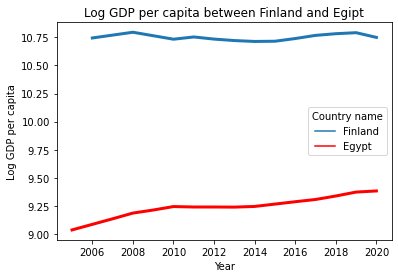

In [ ]:
sns.lineplot(x=df_finland['year'],y=df_finland['Log GDP per capita'], hue="Country name", linewidth="3", data=df_finland, color = 'green')
sns.lineplot(x=df_egypt['year'],y=df_egypt['Log GDP per capita'],hue="Country name", linewidth="3", data=df_egypt, palette = color)

# Afegir títol i etiquetes
plt.title("Log GDP per capita between Finland and Egipt")
plt.xlabel("Year")
plt.ylabel("Log GDP per capita")

# Mostrar gràfic
plt.show()

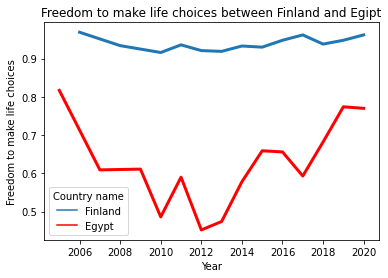

In [ ]:
sns.lineplot(x=df_finland['year'],y=df_finland['Freedom to make life choices'], hue="Country name", linewidth="3", data=df_finland, color = 'green')
sns.lineplot(x=df_egypt['year'],y=df_egypt['Freedom to make life choices'],hue="Country name", linewidth="3", data=df_egypt, palette = color)

# Afegir títol i etiquetes
plt.title("Freedom to make life choices between Finland and Egipt")
plt.xlabel("Year")
plt.ylabel("Freedom to make life choices")

# Mostrar gràfic
plt.show()

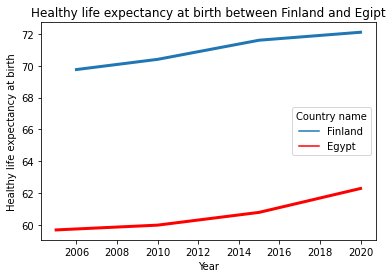

In [ ]:
sns.lineplot(x=df_finland['year'],y=df_finland['Healthy life expectancy at birth'], hue="Country name", linewidth="3", data=df_finland, color = 'green')
sns.lineplot(x=df_egypt['year'],y=df_egypt['Healthy life expectancy at birth'], hue="Country name", linewidth="3", data=df_egypt, palette = color)

# Afegir títol i etiquetes
plt.title("Healthy life expectancy at birth between Finland and Egipt")
plt.xlabel("Year")
plt.ylabel("Healthy life expectancy at birth")

# Mostrar gràfic
plt.show()

Com es pot comprovar als diferents gràfics mostrats anteriorment, la diferència entre algunes de les variables és molt gran. 

#5. Resolució del problema

Hem pogut arribar a diverses conclusions gràcies a l'anàlisi realitzat, com per exemple que la renda per capita està molt relacionada amb la felicitat, ja que és possible tenir més oportunitats d'accedir a millor recursos, com per exemple els relacionats amb la salut. Aquesta està directament relacionada amb l'esperança de vida. Per tant són tres variables que es retroalimenten. 


Per altre costat hem volgut trobar una relació amb la climatologia que no ha resultat efectiva. Però també hem valorat que la felicitat es pot mesurar amb molts més factors dels que surten al dataset de "World Happiness Report", i també hem pogut comprovar que hi ha altres estudis, com per exemple el de *Happy Planet Index*, que diuen que Costa Rica és el país més feliç del món, ja que es tenen en compte altres tipus de variables. Es pot veure aquest estudi a https://happyplanetindex.org/wp-content/themes/hpi/public/downloads/happy-planet-index-briefing-paper.pdf. Ens hem plantejat seguir amb l'estudi, però per a la pràctica no ens donava temps poder comparar més datasets. 


Finalment també hem volgut comparar el dataset de suicidi per comprobar les possibles relacions. La conclusió és que a menor índex de felicitat si que s'ha pogut constatar que hi ha un augment de suicidis, però no d'una manera molt clara.



<table>
  <tr>
      <td>Contribucions</td><td>Signatura</td>
  </tr>
<tr>
      <td>Investigació prèvia</td><td>Miquel Muntaner, Miquel Piulats </td>
  </tr><tr>
      <td>Redacció de les respostes</td><td>Miquel Muntaner, Miquel Piulats</td>
  </tr>
  </tr><tr>
      <td>Desenvolupament del codi</td><td>Miquel Muntaner, Miquel Piulats</td>
  </tr>
  </tr><tr>
      <td>Participació al vídeo</td><td>Miquel Muntaner, Miquel Piulats</td>
  </tr>
</table>